# **1 Money Change Again**

In [ ]:
def MinimumChange(amount,denominations = [1,3,4]):
    minChanges = [0] # This is the list where we are gonna store the minimum value of change all the amount 
    # from 0 to amount, the aim of this is only have to calculate each amount once time, if you see the 
    # recursion tree you'll see that you need calculate the same thing many times, so this makes all sense 

    for i in range(1,amount +1): # Going from 1 to amount calculating the min amount
        
        minimum_coins = float('Inf') # Initializating the min coins
        j = 0
        while i >= denominations[j] and j < 3: # Iterating for the denominations seeing which offers best change
            coins_needed = 1 + minChanges[i - denominations[j]]
            if coins_needed < minimum_coins: # This if will leave the minimum amount of coins
                minimum_coins = coins_needed
            j += 1
            if j == 3:
                break
        minChanges.append(minimum_coins)

    return minChanges[amount]

if __name__ == '__main__':
    amount = int(input())
    min_coins = MinimumChange(amount)
    print(min_coins)

# **2 Primitive Calculator**

In [ ]:
def Calculate(n):
    C = [-1,[1]] # Here we store the minimum number of steps to reach any number from 1 to n,
    # with the respective intermediate steps always starting from 1, then we substract 1 from 
    # the final output to not count the step '1'

    for i in range(2,n+1):
        min_op = float('Inf') # Minimum operations
        operations = [1] # Here we will store the steps

        # Then we check doing C(n/2), C(n/3) and C(n-1), and we take the minimum
        if (i % 2) == 0:
            back_step = int(i/2)
            op = len(C[back_step])
            if op < min_op:
                min_op = op
                operations = C[back_step] + [2*(C[back_step][op - 1])]
        if (i % 3) == 0:
            back_step = int(i/3)
            op = len(C[back_step])
            if op < min_op:
                min_op = op
                operations = C[back_step] + [3*(C[back_step][op - 1])]
        
        back_step = i - 1
        op = len(C[back_step])
        if op < min_op:
            min_op = op
            operations = C[back_step] + [C[back_step][op - 1] + 1]

        C.append(operations)
    
    C[n] = [str(x) for x in C[n]]
    print(len(C[n]) - 1)
    print(' '.join(C[n]))

if __name__ == '__main__':
    n = int(input())
    Calculate(n)
    

# **3 Edit Distance** 

In [ ]:
def EditDistance(s1, s2, m, n):
    # Create a table to store results of subproblems
    dp = [[0 for x in range(n + 1)] for x in range(m + 1)]
 
    # Fill d[][] in bottom up manner
    for i in range(m + 1):
        for j in range(n + 1):
 
            # If first string is empty, only option is to
            # insert all characters of second string
            if i == 0:
                dp[i][j] = j    # Min. operations = j
 
            # If second string is empty, only option is to
            # remove all characters of second string
            elif j == 0:
                dp[i][j] = i    # Min. operations = i
 
            # If last characters are same, ignore last char
            # and recur for remaining string
            elif s1[i-1] == s2[j-1]:
                dp[i][j] = dp[i-1][j-1]
 
            # If last character are different, consider all
            # possibilities and find minimum
            else:
                dp[i][j] = 1 + min(dp[i][j-1],        # Insert
                                   dp[i-1][j],        # Remove
                                   dp[i-1][j-1])    # Replace
 
    return dp[m][n]


if __name__ == '__main__':
    s1 = input()
    s2 = input()
    print(EditDistance(s1,s2,len(s1),len(s2)))

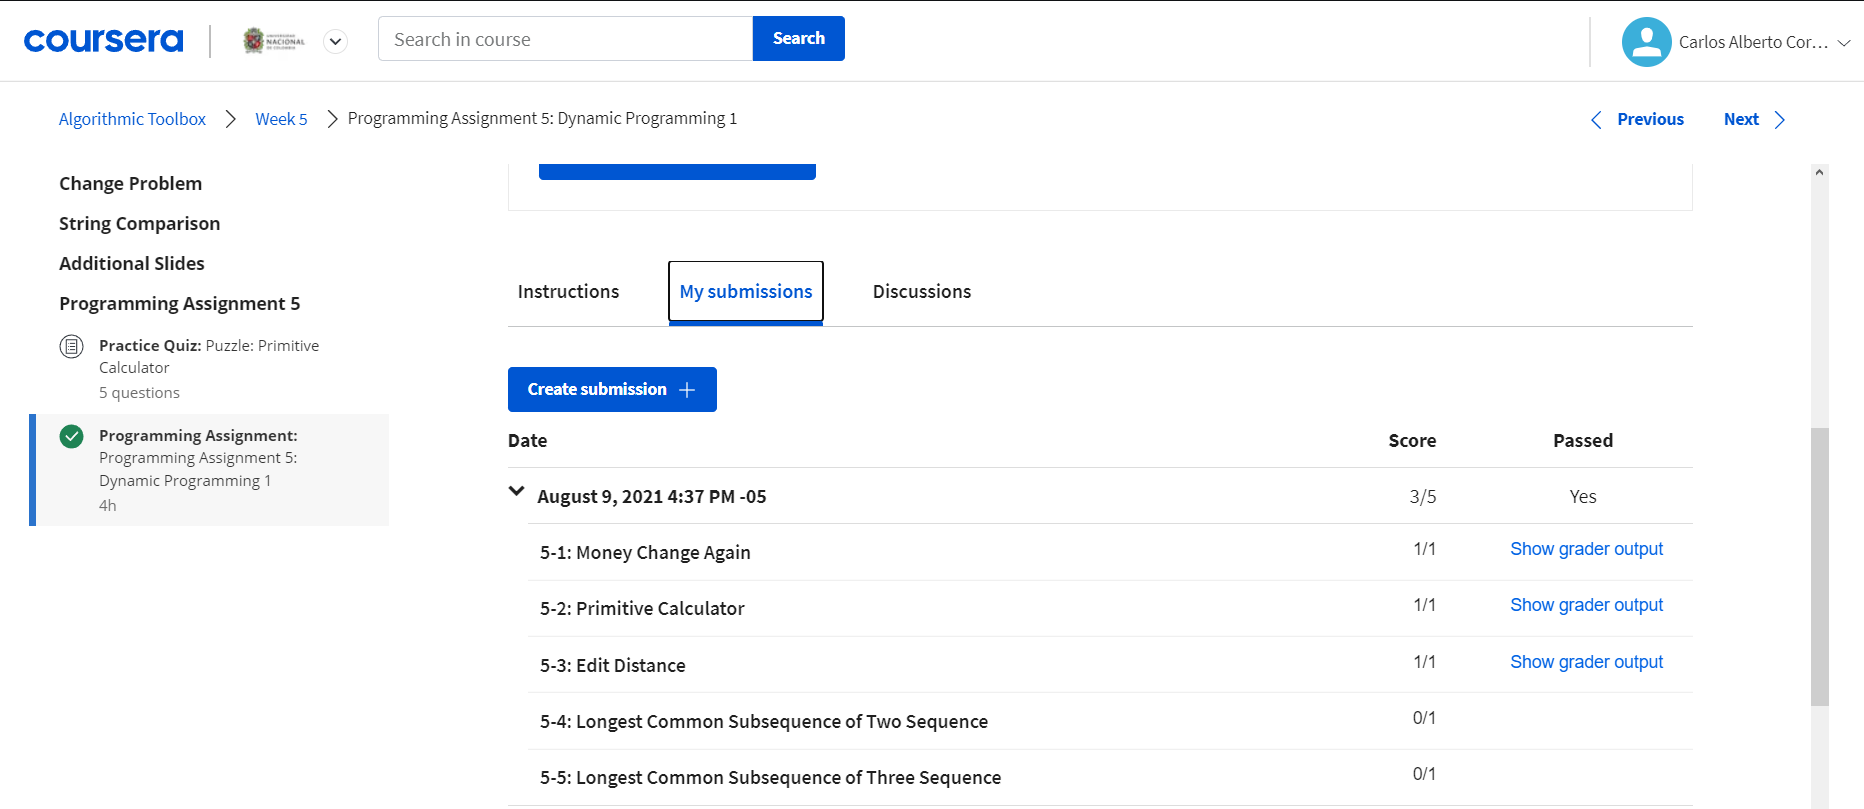